In [201]:
import pandas as pd
raw_df=pd.read_csv('/content/drive/MyDrive/competition2 train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/competition2 test.csv')
raw_df['mode'] = 'train'
test_data['mode'] = 'test'
raw_df = pd.concat([raw_df,test_data]).reset_index(drop=True)
raw_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,mode
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,train


In [202]:
#Checking NULLs
raw_df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
mode               0
dtype: int64

In [203]:


raw_df['group'] = raw_df['PassengerId'].str.split('_').str[0]
raw_df['n_within_grp'] = raw_df['PassengerId'].str.split('_').str[1]

raw_df['deck'] = raw_df['Cabin'].str.split('/').str[0]
raw_df['num'] = raw_df['Cabin'].str.split('/').str[1]
raw_df['side'] = raw_df['Cabin'].str.split('/').str[2]



In [204]:
group_homeplanet_ = raw_df.loc[~raw_df.HomePlanet.isnull()]\
  [['group','HomePlanet']]\
  .drop_duplicates()\
  .reset_index(drop=True)
group_homeplanet_map = dict(zip(group_homeplanet_['group'],group_homeplanet_['HomePlanet']))
raw_df['HomePlanet'] = raw_df['group'].map(group_homeplanet_map).fillna(raw_df['HomePlanet'])

group_destination_ = raw_df.loc[~raw_df.Destination.isnull()]\
    [['group','Destination']]\
    .drop_duplicates()\
    .dropna()\
    .reset_index(drop=True)
group_destination_map = dict(zip(group_destination_['group'],group_destination_['Destination']))
raw_df['Destination'] = raw_df['group'].map(group_destination_map).fillna(raw_df['Destination'])


In [205]:
raw_df['CryoSleep'] = raw_df.CryoSleep.map({False:0,True:1})
raw_df['VIP'] = raw_df.VIP.map({False:0,True:1})


In [206]:


raw_df.loc[(raw_df.CryoSleep==1) & (raw_df.RoomService.isnull()),'RoomService']=0
raw_df.loc[(raw_df.CryoSleep==1) & (raw_df.FoodCourt.isnull()),'FoodCourt']=0
raw_df.loc[(raw_df.CryoSleep==1) & (raw_df.ShoppingMall.isnull()),'ShoppingMall']=0
raw_df.loc[(raw_df.CryoSleep==1) & (raw_df.Spa.isnull()),'Spa']=0
raw_df.loc[(raw_df.CryoSleep==1) & (raw_df.VRDeck.isnull()),'VRDeck']=0



In [207]:
raw_df['luxury_spending'] = raw_df['RoomService'].fillna(0) \
                                    + raw_df['FoodCourt'].fillna(0) \
                                    + raw_df['ShoppingMall'].fillna(0) \
                                    + raw_df['Spa'].fillna(0) \
                                    + raw_df['VRDeck'].fillna(0) 

In [208]:


vip_spend_df = raw_df[['VIP','luxury_spending']]
print(vip_spend_df.query("VIP==1").luxury_spending.mean())
raw_df.loc[(raw_df.luxury_spending>=4595) & (raw_df.VIP.isnull()),'VIP']=1



4595.542124542125


In [209]:
raw_df.isnull().sum()

PassengerId           0
HomePlanet          157
CryoSleep           310
Cabin               299
Destination         154
Age                 270
VIP                 269
RoomService         170
FoodCourt           180
ShoppingMall        175
Spa                 177
VRDeck              177
Name                294
Transported        4277
mode                  0
group                 0
n_within_grp          0
deck                299
num                 299
side                299
luxury_spending       0
dtype: int64

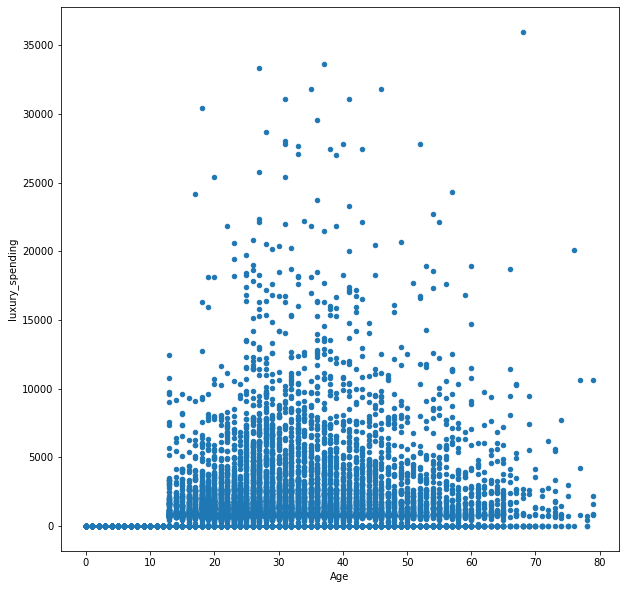

In [210]:
age_spending_df = raw_df[['Age','luxury_spending']]

age_spending_df.plot(kind='scatter', x='Age', y='luxury_spending',figsize=(10,10))

In [211]:
raw_df.loc[(raw_df.Age<=12) & (raw_df.RoomService.isnull()),'RoomService']=0
raw_df.loc[(raw_df.Age<=12) & (raw_df.FoodCourt.isnull()),'FoodCourt']=0
raw_df.loc[(raw_df.Age<=12) & (raw_df.ShoppingMall.isnull()),'ShoppingMall']=0
raw_df.loc[(raw_df.Age<=12) & (raw_df.Spa.isnull()),'Spa']=0
raw_df.loc[(raw_df.Age<=12) & (raw_df.VRDeck.isnull()),'VRDeck']=0

raw_df = raw_df.drop('luxury_spending',axis=1)

raw_df['luxury_spending'] = raw_df['RoomService'].fillna(0) \
                                    + raw_df['FoodCourt'].fillna(0) \
                                    + raw_df['ShoppingMall'].fillna(0) \
                                    + raw_df['Spa'].fillna(0) \
                                    + raw_df['VRDeck'].fillna(0) 

In [212]:
print(f'Mean Spending for VIPS {raw_df.query("VIP==1").luxury_spending.mean()}')
print(f'Mean Spending for Non VIPS {raw_df.query("VIP==0").luxury_spending.mean()}')

Mean Spending for VIPS 5181.95
Mean Spending for Non VIPS 1358.2765099588744


In [213]:
raw_df.loc[(raw_df.VIP.isnull()) & (raw_df.luxury_spending.mean()<5181),'VIP']=0

In [214]:
raw_df = raw_df.drop('Name',axis=1)

In [215]:
group_deck_df = raw_df[['group','n_within_grp','Cabin']].dropna()

In [216]:
group_deck_df.query("group=='0709'")

,group,n_within_grp,Cabin
677,0709,01,A/7/S
678,0709,02,A/7/S


In [217]:
group_deck_map = dict(zip(group_deck_df['group'],group_deck_df['Cabin']))
raw_df['Cabin'] = raw_df['group'].map(group_deck_map).fillna(raw_df['Cabin'])
raw_df['deck'] = raw_df['Cabin'].str.split('/').str[0]
raw_df['num'] = raw_df['Cabin'].str.split('/').str[1]
raw_df['side'] = raw_df['Cabin'].str.split('/').str[2]
raw_df = raw_df.drop('Cabin',axis=1)

In [218]:
missing_string_columns = ['HomePlanet','Destination','deck','num','side']
missing_number_columns = ['Age','RoomService','FoodCourt','ShoppingMall',
                          'Spa','VRDeck','CryoSleep','VIP']


In [219]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')



In [220]:


raw_df[missing_number_columns] = imp_median.fit_transform(raw_df[missing_number_columns])
raw_df[missing_string_columns] = imp_frequent.fit_transform(raw_df[missing_string_columns])



In [221]:
from scipy.special import boxcox1p
raw_df['RoomService'] = raw_df['RoomService'].apply(lambda x: boxcox1p(x,0.25))
raw_df['FoodCourt'] = raw_df['FoodCourt'].apply(lambda x: boxcox1p(x,0.25))
raw_df['ShoppingMall'] = raw_df['ShoppingMall'].apply(lambda x: boxcox1p(x,0.25))
raw_df['Spa'] = raw_df['Spa'].apply(lambda x: boxcox1p(x,0.25))
raw_df['VRDeck'] = raw_df['VRDeck'].apply(lambda x: boxcox1p(x,0.25))

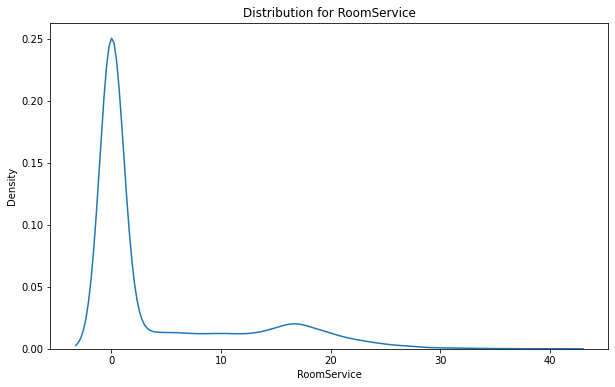

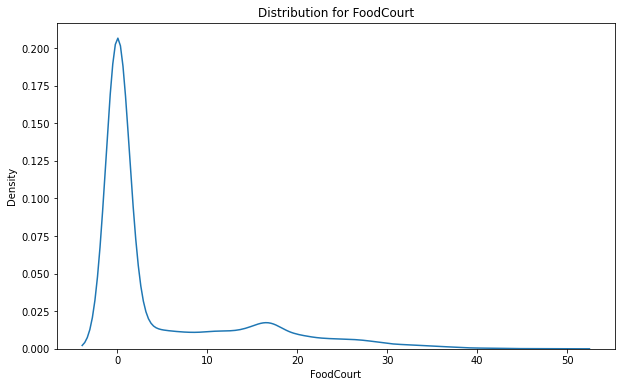

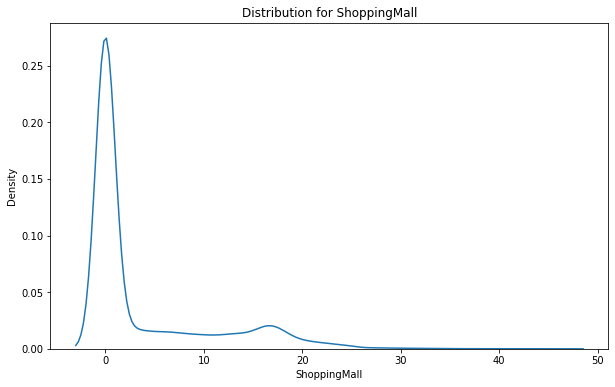

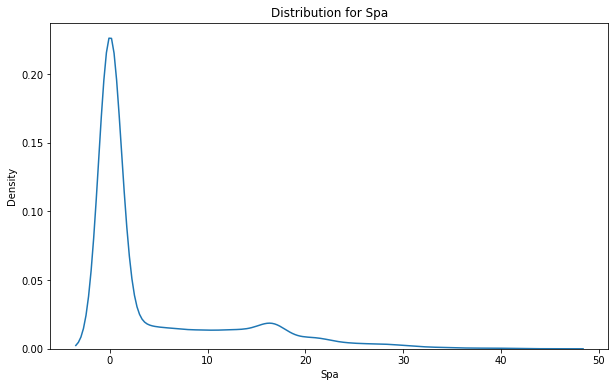

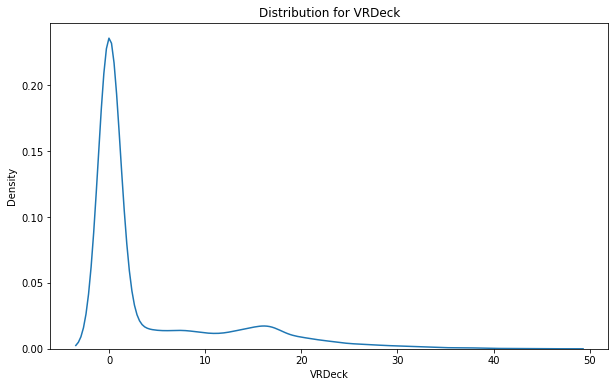

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.kdeplot(data=combined_data,x="Age")
kde_plot = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in kde_plot:
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=raw_df,x=col)
    plt.title(f'Distribution for {col}')
    plt.show()

In [223]:
train_id = raw_df['PassengerId']


In [224]:
raw_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,mode,group,n_within_grp,deck,num,side,luxury_spending
0,0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,train,0001,01,B,0,P,0.0
1,0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,8.954127,3.113118,5.032403,15.370939,6.360080,True,train,0002,01,F,0,S,736.0
2,0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,6.302038,26.934260,0.000000,32.210762,6.636592,False,train,0003,01,A,0,S,10383.0
3,0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.000000,19.944250,13.566924,26.385826,10.928302,False,train,0003,02,A,0,S,5176.0
4,0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,12.702381,7.611132,10.044972,15.510307,1.264296,True,train,0004,01,F,1,S,1091.0


In [225]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
mode              0
dtype: int64

In [226]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'mode'],
      dtype='object')

class 0: (4315, 19)
class 1: (4378, 19)


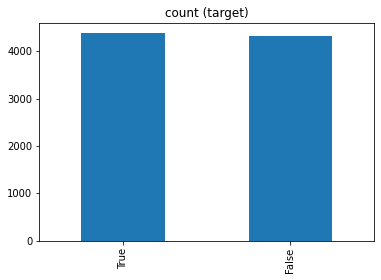

In [227]:
#Checking if Imbalanced class
class_count_0, class_count_1 = raw_df['Transported'].value_counts()

# Separate class
class_0 = raw_df[raw_df['Transported'] == 0]
class_1 = raw_df[raw_df['Transported'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
raw_df['Transported'].value_counts().plot(kind='bar', title='count (target)')

In [228]:
raw_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'mode', 'group', 'n_within_grp', 'deck', 'num', 'side',
       'luxury_spending'],
      dtype='object')

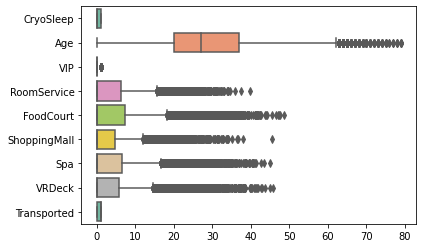

In [229]:
#Detecting for outliers
import seaborn as sns
df_2 = raw_df[['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'deck',
       'num', 'side']]

ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

In [230]:
raw_df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported        4277
mode                  0
group                 0
n_within_grp          0
deck                  0
num                   0
side                  0
luxury_spending       0
dtype: int64

In [187]:

'''
# Removing outliers
import sklearn
import numpy as np
import pandas as pd

Q1 = np.percentile(raw_df['RoomService'], 25, interpolation = 'midpoint')
Q3 = np.percentile(raw_df['RoomService'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(raw_df['RoomService'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(raw_df['RoomService'] <= (Q1-1.5*IQR))

Removing the Outliers 
raw_df.drop(upper[0], inplace = True)
raw_df.drop(lower[0], inplace = True)

Q1 = np.percentile(raw_df['RoomService'], 25, interpolation = 'midpoint')
Q3 = np.percentile(raw_df['RoomService'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(raw_df['RoomService'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(raw_df['RoomService'] <= (Q1-1.5*IQR))

 Removing the Outliers 
raw_df.drop(upper[0], inplace = True)
raw_df.drop(lower[0], inplace = True)

print("New Shape: ", raw_df.shape)
'''

'\n# Removing outliers\nimport sklearn\nimport numpy as np\nimport pandas as pd\n\nQ1 = np.percentile(raw_df[\'RoomService\'], 25, interpolation = \'midpoint\')\nQ3 = np.percentile(raw_df[\'RoomService\'], 75, interpolation = \'midpoint\')\nIQR = Q3 - Q1\n# Upper bound\nupper = np.where(raw_df[\'RoomService\'] >= (Q3+1.5*IQR))\n# Lower bound\nlower = np.where(raw_df[\'RoomService\'] <= (Q1-1.5*IQR))\n\nRemoving the Outliers \nraw_df.drop(upper[0], inplace = True)\nraw_df.drop(lower[0], inplace = True)\n\nQ1 = np.percentile(raw_df[\'RoomService\'], 25, interpolation = \'midpoint\')\nQ3 = np.percentile(raw_df[\'RoomService\'], 75, interpolation = \'midpoint\')\nIQR = Q3 - Q1\n# Upper bound\nupper = np.where(raw_df[\'RoomService\'] >= (Q3+1.5*IQR))\n# Lower bound\nlower = np.where(raw_df[\'RoomService\'] <= (Q1-1.5*IQR))\n\n Removing the Outliers \nraw_df.drop(upper[0], inplace = True)\nraw_df.drop(lower[0], inplace = True)\n\nprint("New Shape: ", raw_df.shape)\n'

In [231]:
# checking categorical features
cat = raw_df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['PassengerId', 'HomePlanet', 'Destination', 'Transported', 'mode',
       'group', 'n_within_grp', 'deck', 'num', 'side'],
      dtype='object')

In [232]:
# creating new df setting columns we use

new_cat_df = raw_df[['HomePlanet', 'Destination', 'deck', 'side']]
new_cat_df.head()

,HomePlanet,Destination,deck,side
0,Europa,TRAPPIST-1e,B,P
1,Earth,TRAPPIST-1e,F,S
2,Europa,TRAPPIST-1e,A,S
3,Europa,TRAPPIST-1e,A,S
4,Earth,TRAPPIST-1e,F,S


In [233]:
# unique values in each columns
for x in new_cat_df.columns:
    #prinfting unique values
    print(x ,':', len(new_cat_df[x].unique()))

HomePlanet : 3
Destination : 3
deck : 8
side : 2


In [234]:
# evaluate logistic regression on the breast cancer dataset with an one-hot encoding
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [235]:
raw_df['Transported'] = raw_df['Transported'].map({True:1,False:0})

In [193]:

# one-hot encode input variables
#onehot_encoder = OneHotEncoder()
#onehot_encoder.fit(new_cat_df)
#new_cat_df = onehot_encoder.transform(new_cat_df)

In [236]:
raw_df = pd.get_dummies(raw_df, columns = ['HomePlanet', 'Destination', 'deck', 'side'])
print(raw_df)

      PassengerId  CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall  \
0         0001_01        0.0  39.0  0.0     0.000000   0.000000      0.000000   
1         0002_01        0.0  24.0  0.0     8.954127   3.113118      5.032403   
2         0003_01        0.0  58.0  1.0     6.302038  26.934260      0.000000   
3         0003_02        0.0  33.0  0.0     0.000000  19.944250     13.566924   
4         0004_01        0.0  16.0  0.0    12.702381   7.611132     10.044972   
...           ...        ...   ...  ...          ...        ...           ...   
12965     9266_02        1.0  34.0  0.0     0.000000   0.000000      0.000000   
12966     9269_01        0.0  42.0  0.0     0.000000  17.585343      4.239069   
12967     9271_01        1.0  27.0  0.0     0.000000   0.000000      0.000000   
12968     9273_01        0.0  27.0  0.0     0.000000  24.782877      0.000000   
12969     9277_01        1.0  43.0  0.0     0.000000   0.000000      0.000000   

             Spa     VRDeck

In [237]:

raw_df['num']=raw_df['num'].astype(int)
train_data = raw_df.query("mode=='train'")
test_data = raw_df.query("mode=='test'")
train_data = train_data.drop(['mode','group','n_within_grp','luxury_spending','PassengerId']
                             ,axis=1).reset_index(drop=True)
#test_data = test_data.drop(['mode','PassengerId'],axis=1).reset_index(drop=True)
test_data = test_data.drop(['mode','group','n_within_grp','Transported',
                            'luxury_spending','PassengerId']
                           ,axis=1).reset_index(drop=True)
train_data.shape,test_data.shape

((8693, 26), (4277, 25))

In [238]:
raw_df.query("mode=='train'").shape,raw_df.query("mode=='test'").shape

((8693, 31), (4277, 31))

In [239]:
y=train_data['Transported']
X=train_data.copy()
X = X.drop('Transported', axis=1)

In [240]:
X.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,num,HomePlanet_Earth,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0.0,39.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.0,24.0,0.0,8.954127,3.113118,5.032403,15.370939,6.360080,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0.0,58.0,1.0,6.302038,26.934260,0.000000,32.210762,6.636592,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,33.0,0.0,0.000000,19.944250,13.566924,26.385826,10.928302,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,16.0,0.0,12.702381,7.611132,10.044972,15.510307,1.264296,1,1,...,0,0,0,0,0,1,0,0,0,1


In [241]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_scaled = trans.fit_transform(X)
# convert the array back to a dataframe
X = DataFrame(X_scaled)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [244]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [245]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1072  351]
 [ 244 1202]]


In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1423
         1.0       0.77      0.83      0.80      1446

    accuracy                           0.79      2869
   macro avg       0.79      0.79      0.79      2869
weighted avg       0.79      0.79      0.79      2869



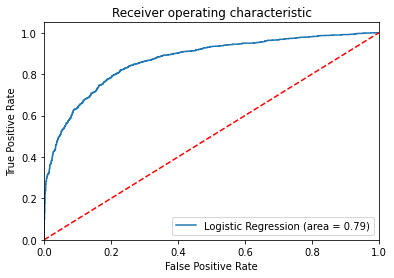

In [247]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [248]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.73277,0.711945,-0.158486,-0.577353,-0.569331,-0.558863,-0.579178,-0.560959,-1.156168,-1.096300,...,-0.175588,3.141059,-0.309296,-0.248346,-0.340677,-0.692393,-0.660953,-0.02399,1.022218,-1.022218
1,-0.73277,-0.334037,-0.158486,0.664820,-0.210813,0.204796,1.414959,0.270252,-1.156168,0.912159,...,-0.175588,-0.318364,-0.309296,-0.248346,-0.340677,1.444267,-0.660953,-0.02399,-0.978264,0.978264
2,-0.73277,2.036857,6.309691,0.296906,2.532518,-0.558863,3.599661,0.306390,-1.156168,-1.096300,...,5.695140,-0.318364,-0.309296,-0.248346,-0.340677,-0.692393,-0.660953,-0.02399,-0.978264,0.978264
3,-0.73277,0.293552,-0.158486,-0.577353,1.727523,1.499897,2.843967,0.867281,-1.156168,-1.096300,...,5.695140,-0.318364,-0.309296,-0.248346,-0.340677,-0.692393,-0.660953,-0.02399,-0.978264,0.978264
4,-0.73277,-0.891895,-0.158486,1.184802,0.307195,0.965446,1.433040,-0.395726,-1.154205,0.912159,...,-0.175588,-0.318364,-0.309296,-0.248346,-0.340677,1.444267,-0.660953,-0.02399,-0.978264,0.978264


In [258]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_shape=(25,), activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
583/583 [==============================] - 3s 2ms/step - loss: 0.5018 - accuracy: 0.7600
Epoch 2/50
583/583 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.7950
Epoch 3/50
583/583 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.7989
Epoch 4/50
583/583 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8046
Epoch 5/50
583/583 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8036
Epoch 6/50
583/583 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 0.8019
Epoch 7/50
583/583 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8118
Epoch 8/50
583/583 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8110
Epoch 9/50
583/583 [==============================] - 1s 2ms/step - loss: 0.3849 - accuracy: 0.8115
Epoch 10/50
583/583 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8134

In [249]:
sample_data=pd.read_csv('/content/sample_submission.csv')

In [250]:
test_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'num', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'deck_A',
       'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T',
       'side_P', 'side_S'],
      dtype='object')

In [251]:
test_pred = logreg.predict(test_data)
sample_data.loc[:,'Transported']=test_pred
sample_data['Transported'] = sample_data['Transported'].map({1:True,0:False})
sample_data.to_csv('sample_fasai.csv',index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
